<a href="https://colab.research.google.com/github/cpython-projects/python_da_06_11_25/blob/main/lesson_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Питання 1  

**Наскільки вигідно інвестувати в збільшення площі будинку?**  
**Чи кожні додаткові 10 м² реально дають відчутний приріст ціни?**

## Що таке кореляція

### Інтуїтивне визначення

Кореляція — це міра того, **наскільки дві змінні змінюються разом**.

Не:

> “X викликає Y”

А:

> “Коли X зростає, що зазвичай відбувається з Y?”

---

### Приклади

* Чим більша реклама → тим більші продажі?
* Чим більше досвіду → тим вища зарплата?
* Чим більша площа → тим дорожче житло?

---

### Діапазон

Кореляція ∈ [-1, 1]

| Значення | Інтерпретація                |
| -------- | ---------------------------- |
| -1       | ідеальний негативний         |
| 0        | зв’язку немає                |
| 0.00 – 0.10          | Практично немає зв’язку        |
| 0.10 – 0.30          | Дуже слабкий                   |
| 0.30 – 0.50          | Слабкий / помірний             |
| 0.50 – 0.70          | Помірний / сильний             |
| 0.70 – 0.90          | Сильний                        |
| 0.90 – 1.00          | Дуже сильний / майже ідеальний |

**Знак кореляції — це теж бізнес-інформація:**
* позитивна (r > 0): чим більше X → тим більше Y  
  приклад: площа → ціна
* негативна (r < 0): чим більше X → тим менше Y  
  приклад: вік будинку → ціна

### Корелаяція Pearson — лінійна залежність

Корелаяція Pearson відповідає на питання:

> **Чи можна описати зв’язок між X і Y майже прямою лінією?**

* Позитивний r → X↑ → Y↑
* Негативний r → X↑ → Y↓
* r близько 0 → прямої залежності майже немає


#### Умови, коли допустимо використовувати:

* Обидві змінні **кількісні (interval/ratio)**
* Зовнішній вигляд графіку **наближено лінійний**
* Немає сильних викидів, або їх мало
* Мета — **лінійний тренд** (Y ~ a·X + b)

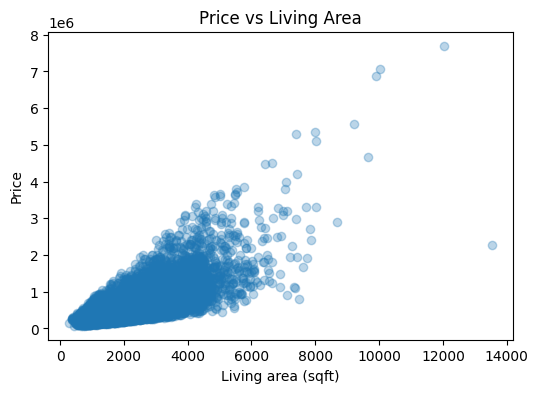

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['sqft_living'], df['price'], alpha=0.3)
plt.xlabel('Living area (sqft)')
plt.ylabel('Price')
plt.title('Price vs Living Area')
plt.show()

In [8]:
df[['price', 'sqft_living']].corr(method='pearson')

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


Площа — важливий фактор, але недостатній сам по собі.  
Для точних прогнозів потрібно також враховувати інші характеристики.

# Питання 2

**Чи варто робити більше кімнат, чи після певного моменту це не має сенсу?**

## Кореляція Spearman — монотонна залежність

Spearman відповідає на питання:

> **Чи змінюється Y разом із X в одному напрямку, навіть якщо не по прямій?**

* Позитивний ρ → X↑ → Y↑
* Негативний ρ → X↑ → Y↓
* ρ близько 0 → монотонної залежності майже немає

---

#### Умови, коли допустимо використовувати:

* Обидві змінні **кількісні (interval/ratio)** або **рангові (ordinal)**
* Залежність може бути **нелінійною, але монотонною**
* Є **викиди**, які можуть спотворювати Pearson
* Мета — оцінити **монотонний тренд**, а не лінійність

In [9]:
df[['price', 'bedrooms']].corr(method='spearman')

,price,bedrooms
price,1.000000,0.344652
bedrooms,0.344652,1.000000


Кількість спалень впливає на ціну, але це не головний фактор.

# Питання 3

Чи виправдано вкладатися в дорогі матеріали та преміум-ремонт?
Чи це реально конвертується в вищу ціну продажу?

### Kendall Tau — порядок/ранги

Kendall відповідає на питання:

> **Наскільки збігаються порядки між X і Y?**

* Позитивний τ → більші X співпадають із більшими Y
* Негативний τ → більші X співпадають із меншими Y
* τ близько 0 → порядок майже не збігається

---

# Що означає «порядки»

«Порядок» = **хто вище, хто нижче, хто попереду, хто позаду.**
Не важливо *наскільки*, важливо **хто кращий від кого**.

| Студент | Оцінка з математики | Оцінка з фізики |
| ------- | ------------------- | --------------- |
| A       | 90                  | 88              |
| B       | 85                  | 80              |
| C       | 70                  | 75              |
| D       | 60                  | 65              |
| E       | 50                  | 40              |

Тут порядок майже однаковий:

Math: A > B > C > D > E
Physics: A > B > C > D > E

**Порядки збігаються ідеально.**
Kendall ≈ 1.

---

#### Умови, коли допустимо використовувати:

* Дані **рангові (ordinal)** або **кількісні**, де важливий порядок, а не точна величина
* **Мала вибірка**
* Є багато однакових значень (ties)
* Мета — оцінити **узгодженість порядків**, а не силу лінійного тренду

In [10]:
df[['price', 'grade']].corr(method='kendall')

,price,grade
price,1.000000,0.527834
grade,0.527834,1.000000


Так. Якість — один з найсильніших факторів ціни.
Преміум-ремонт окупається.

### Практичний алгоритм вибору

#### 1) Подивись на шкалу

* **Ratio/Interval** → Pearson або Spearman
* **Ordinal** → Spearman або Kendall

---

#### 2) Подивись на графік

* Якщо точки *виглядають по прямій → Pearson*
* Якщо тренд *монотонний, але не пряма → Spearman*
* Якщо багато однакових або порядки важливі → Kendall

---

#### 3) Подивись на розподіл

* Сильно *не нормальний, важкі хвости,* або *викиди* → Spearman / Kendall
* Нормальний/виражений лінійний тренд → Pearson

# Розрахунок кореляції через scipy.stats

* Повертає **коефіцієнт кореляції** і **p-value**
* Можна вибрати потрібний метод (`pearsonr`, `spearmanr`, `kendalltau`)
* **Плюс:** отримуємо статистичну значущість
* **Мінус:** треба робити для **пар змінних окремо**, не таблицею

---

## Що таке p-value у кореляції

* **p-value** показує, наскільки отримане значення кореляції могло виникнути **випадково**, якщо насправді **зв’язку немає**
* Інтерпретація:

| p-value | Інтерпретація                                                           |
| ------- | ----------------------------------------------------------------------- |
| < 0.05  | кореляція статистично значуща (висока ймовірність, що зв’язок реальний) |
| ≥ 0.05  | кореляція **не є статистично значущою** (може бути випадковою)          |

## Практична порада

* **Якщо треба швидко оцінити матрицю кореляцій** → `df.corr()`
* **Якщо потрібна статистична значущість** → `scipy.stats`

# Питання 4

**«Що сильніше впливає на ціну: рік побудови чи якість будинку?»**

In [11]:
# grade — порядкова шкала (ordinal)
# yr_built — кількісна

df[['price', 'grade', 'yr_built']].corr(method='spearman')


,price,grade,yr_built
price,1.000000,0.658215,0.102038
grade,0.658215,1.000000,0.500633
yr_built,0.102038,0.500633,1.000000


Ціну формує не вік будинку, а його якість.  
Рік побудови важливий лише настільки, наскільки він пов’язаний із якістю.  

# Питання 5

**В якому діапазоні реально знаходиться середня ціна будинку в нашому сегменті ринку?**

## Що таке довірчий інтервал?

Довірчий інтервал — це **діапазон значень**, який з певним рівнем впевненості (наприклад, 95%) **містить істинне середнє** генеральної сукупності.

Простими словами:

* Якщо ми обчислюємо середню ціну будинків по вибірці, ми не знаємо точне середнє всіх будинків.
* ДІ дає нам **інтервал**, де це середнє з великою ймовірністю знаходиться.

**Приклад:**

* Середня ціна будинку = 700 000, 95% ДІ = (680 000, 720 000)  
* Ми можемо сказати: «Істинне середнє серед всіх будинків, ймовірно, знаходиться між 680 000 та 720 000»

---

## Чому важливо для аналітика?

* ДІ дозволяє **оцінити точність метрики** (середнє, відсотки, LTV і т.д.)
* Може допомогти **порівнювати сегменти** (наприклад, райони чи категорії будинків)
* Використовується для **звітності та обґрунтування рішень**

---

## Формула для довірчого інтервалу середнього

Якщо у нас вибірка `x1, x2, …, xn` з середнім `x̄` і стандартним відхиленням `s`, ДІ обчислюється як:

$$
CI = x̄ \pm z \cdot \frac{s}{\sqrt{n}}
$$

* `z` — критичне значення для рівня довіри (для 95% → 1.96)
* `s` — стандартне відхилення вибірки
* `n` — розмір вибірки


Якщо дані сильно не нормальні, можна попередньо застосувати **логарифм**, а потім обчислити ДІ на log-значеннях.

QQ-plot (Quantile-Quantile plot) — це **графічний метод перевірки, наскільки розподіл ваших даних відповідає теоретичному розподілу**, наприклад, нормальному.

Детальніше:

1. **Ідея**:

   * Візуалізуємо порівняння квантилів (quantiles) вашого набору даних з квантилями обраного теоретичного розподілу.
   * Якщо дані і теоретичний розподіл схожі, точки на графіку будуть лежати приблизно на прямій 45°.

2. **Як читати**:

   * Точки **лежать на прямій** → дані добре підходять до вибраного розподілу (наприклад, нормального).
   * Точки **відхиляються від прямої** → дані відрізняються від цього розподілу.

     * Відхилення на кінцях графіка → проблеми з хвостами (екстремальні значення).
     * Відхилення в середині → проблеми з центральною частиною розподілу.

3. **Для чого використовується**:

   * Перевірка **нормальності даних** перед статистичними тестами (t-тест, ANOVA, регресія).
   * Порівняння з будь-яким іншим теоретичним розподілом (не тільки нормальним).

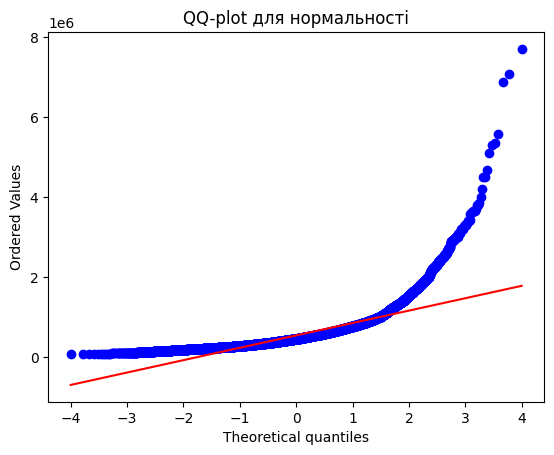

In [12]:
from scipy import stats

stats.probplot(df.price, dist="norm", plot=plt)
plt.title('QQ-plot для нормальності')
plt.show()

<Axes: >

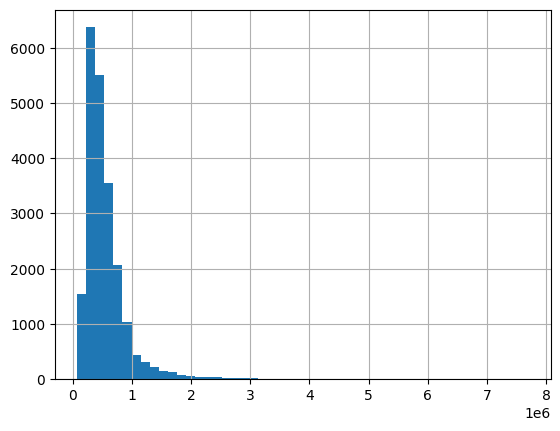

In [13]:
df.price.hist(bins=50)

<Axes: >

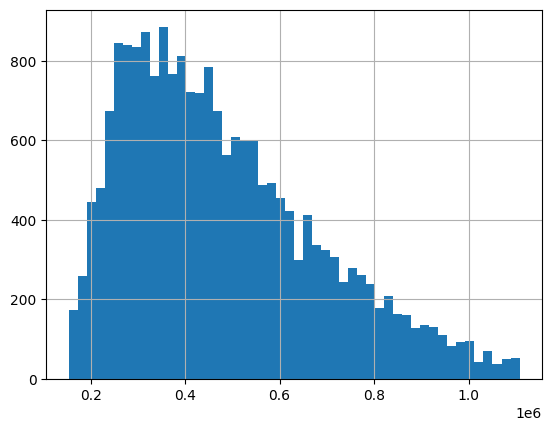

In [26]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df.price >= lower) & (df.price <= upper)]
df.price.hist(bins=50)

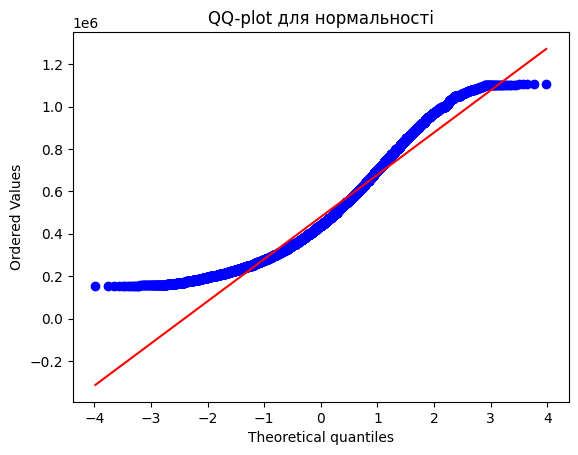

In [27]:
stats.probplot(df.price, dist="norm", plot=plt)
plt.title('QQ-plot для нормальності')
plt.show()


### Логарифм

In [28]:
import numpy as np
df["log_price"] = np.log1p(df["price"])

<Axes: >

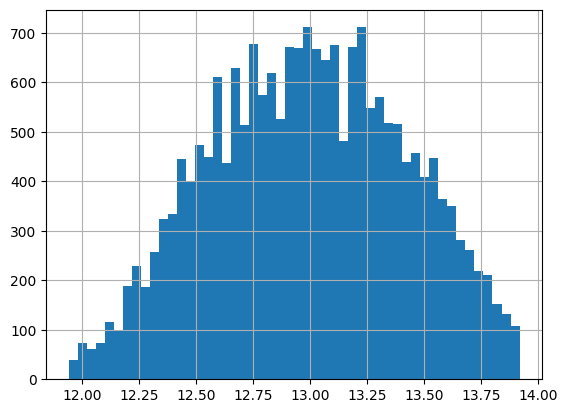

In [29]:
df.log_price.hist(bins=50)

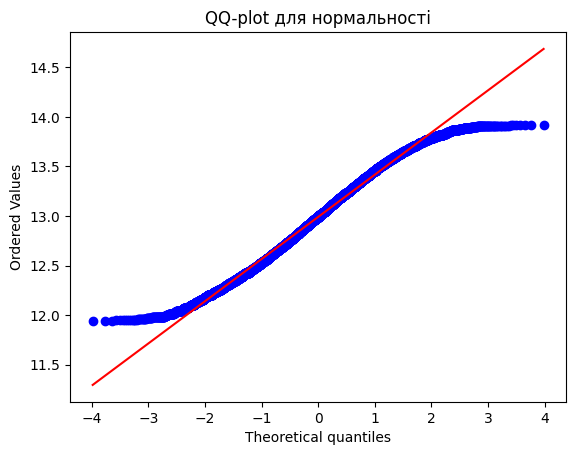

In [30]:
stats.probplot(df.log_price, dist="norm", plot=plt)
plt.title('QQ-plot для нормальності')
plt.show()


In [33]:
mean = df['log_price'].mean()
std = df['log_price'].std()
n = len(df)

ci = stats.norm.interval(
    0.95,
    loc=mean,
    scale=std/np.sqrt(n)
)

ci

(np.float64(12.984789758340812), np.float64(12.996588402252888))

In [34]:
ci_lower_log, ci_upper_log = ci
ci_lower = np.exp(ci_lower_log)
ci_upper = np.exp(ci_upper_log)

print(f"95% CI для цін: {ci_lower:.0f} – {ci_upper:.0f}")


95% CI для цін: 435735 – 440907


In [35]:
df.price.mean()

np.float64(479615.1370269602)